# Analyze discounts
Now it's your turn. Follow [the steps on the platform](https://platform.wbscodingschool.com/courses/data-science/9740/) and use what you've learnt to see how reliable the data is.

## Data Preparation 

### Load data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# orders_qu.csv
url = "https://drive.google.com/file/d/143CzG5DriVSPMkaL1UP4k3Y80oS8fgbV/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_qu = pd.read_csv(path)

# orderlines_qu.csv
url = "https://drive.google.com/file/d/1yWO-mQfxQtnSZdCgdNlIEUrZSCW1HN5O/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_qu = pd.read_csv(path)

# brands_cl.csv
url = "https://drive.google.com/file/d/1m1ThDDIYRTTii-rqM5SEQjJ8McidJskD/view?usp=share_link" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)

# product_categories_cl.csv
url = "https://drive.google.com/file/d/1-MgxWrIaCD20_lvMPJb1qYBsUNsiH5Hw/view?usp=share_link" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cat = pd.read_csv(path)

### Define Pandas display format

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 20)

### Copy Data Frames

In [4]:
orders_df = orders_qu
orderlines_df = orderlines_qu
products_df = products_cat
brands_df = brands

### Merge orderlines and products table

In [5]:
ordlin_prod_df = orderlines_df.merge(products_df, how="left", on="sku")

### To_DateTime

In [6]:
ordlin_prod_df["date"] = pd.to_datetime(ordlin_prod_df["date"])

### Drop unimportant columns

In [7]:
ordlin_prod_df_short = ordlin_prod_df.drop(columns=["id", "product_id","in_stock", "desc"])

### Rename Columns

In [8]:
ordlin_prod_df_short = ordlin_prod_df_short.rename(columns={"id_order": "order_id", "product_quantity": "qty"})

### Add Column "Brands"


In [ ]:
ordlin_prod_df_short["short"] = ordlin_prod_df_short["sku"].str[ : 3]

In [9]:
#ordlin_prod_brands_df = ordlin_prod_df_short.merge(brands_df, how = "inner", on = "short")

ordlin_prod_brands_df = ordlin_prod_df_short

### Categories

Done in 3.7 category creation challenge

### Calculate discount

In [10]:
ordlin_prod_brands_df["discounts"] = ordlin_prod_brands_df["price"] - ordlin_prod_brands_df["unit_price"]

In [11]:
ordlin_prod_brands_df["perc_discounts"] = ordlin_prod_brands_df["discounts"]/ordlin_prod_brands_df["price"]

### add unit_price_total

In [12]:
ordlin_prod_brands_df["unit_price_total"] = ordlin_prod_brands_df["unit_price"] * ordlin_prod_brands_df["qty"]

### Quick overview Discounts - Histograms & Describe

In [ ]:
merged_table_df["discounts"].describe()

In [ ]:
merged_table_df["perc_discounts"].describe()

overall discount are negative and positive. in % the min discount is -2.12 (!!!) max discount is 0.97. on average it is 21% and the median is at 18%

In [ ]:
merged_table_df["discounts"].hist(bins=50);

In [ ]:
merged_table_df["perc_discounts"].hist(bins=50);

noticeable that most of discounts given are actual discounts only a few products have negative discounts.

are there brands that are more likely to have negative discounts? or brands that have big discounts?
When do they usually have them during the year? does that increase there revenue?

In [ ]:
# perc_discounts sorted by value
merged_table_df.sort_values(by="perc_discounts")

In [ ]:
# perc_discounts grouped by brands and sorted
merged_table_df.groupby(["category", "long"])[["perc_discounts"]].mean().sort_values(by="perc_discounts", ascending=False).reset_index()

# some companies have on average a negative discount -> investigate what they sell and when they sell
# some companies have on average a positive discount

### Filter for positive discounts

In [13]:
ordlin_prod_brands_df = ordlin_prod_brands_df[ordlin_prod_brands_df["discounts"] > 0]

In [14]:
ordlin_prod_brands_df["perc_discounts"] = ordlin_prod_brands_df["perc_discounts"]*100

### Copy Table

In [16]:
merged_table_df = ordlin_prod_brands_df.copy()

## Project objectives & overview
**whether or not it’s beneficial to discount products.**


1. How products should be classified into different categories to simplify reports and analysis.
2. What is the distribution of product prices across different categories.
3. How many products are being discounted.
4. How big are the offered discounts as a percentage of the product prices.
5. How seasonality and special dates (Christmas, Black Friday) affect sales.
6. How could data collection be improved.


### 1. How products should be classified into different categories to simplify reports and analysis

### 2. What is the distribution of product prices across different categories

one category is very expensive, the majority has a mean value < 200 euro => apple computers&laptops

companies with the greatest revenue didn't offer the most or the least discount

**smartphones and servers** offered very little discount but have big revenue

repair service has the least revenue and offered the smalles discount

In [17]:
mean_price_by_type = merged_table_df.groupby("category").agg({"price":"mean", "unit_price":"sum", "discounts":"mean"}).reset_index()

In [18]:
# discount as percentage of the actual price
mean_price_by_type["perc_discounts"] = mean_price_by_type["discounts"]/mean_price_by_type["price"]

In [19]:
mean_price_by_type.sort_values(by="perc_discounts", ascending=False)

,category,price,unit_price,discounts,perc_discounts
5,repair services,50.37,5452.49,17.13,0.34
11,tech accessories,62.37,549344.48,18.12,0.29
1,apple computers&laptops,1021.94,230652.03,260.72,0.26
4,others,83.76,383758.10,20.36,0.24
0,adapters & cables,44.25,158379.00,10.35,0.23
2,computer parts,184.20,1052274.85,34.07,0.18
9,storage,166.84,1279015.83,30.59,0.18
3,network devices,198.90,665846.81,32.19,0.16
10,tablets,373.87,577434.77,51.64,0.14
7,smart watches,420.85,164339.87,45.64,0.11


In [ ]:
mean_price_by_type.hist(bins=50); 

looks like one category is always made more expensive

and one is reduced by a lot

In [ ]:
# what categories are those?
mean_price_by_type.sort_values(by="discounts").sort_values(by="unit_price")

### 3. How many products are being discounted?

how many products are there? use qty.sum() because multiple products can be 
in one orderline otherwise ->len(ordlin_prod_brands_df["qty"])

There are 55627 products that got ordered

**93%** of those have an actual discount or their price stays the same

3% are made more expensive

In [ ]:
merged_table_df["qty"].sum()

55627

In [20]:
# percentage of discounted products
merged_table_df[merged_table_df["discounts"] > 0]["qty"].sum()/ordlin_prod_df_short["qty"].sum()

0.9269467264334872

#### Is discount dependent on brand? in % 

#### exclude NaN values

In [ ]:
disc_greater_0.groupby("long").agg({"qty":"sum"})/merged_table_df.groupby("long").agg({"qty":"sum"})

In [ ]:
(disc_equals_0.groupby("long").agg({"qty":"sum"})/merged_table_df.groupby("long").agg({"qty":"sum"})).sort_values(by="qty", ascending=False)

In [ ]:
(disc_smaller_0.groupby("long").agg({"qty":"sum"})/merged_table_df.groupby("long").agg({"qty":"sum"})).sort_values(by="qty", ascending=False)

### 4. How big are the offered discounts as a percentage of the product prices.

How do you deal with negative discounts? So products that got more expensive?


**actual discounts:** 

get discounted on average by 22 %, there are a few products getting a discount of up to **93%**

lowest discounts are in march and april

highest discounts are in june-november,whereas summer discounts stay relatively high.



In [ ]:
# percentage of discount of price
merged_table_df["discount_percentage"] = merged_table_df["discounts"]/merged_table_df["price"]
merged_table_df["discount_percentage"].describe().round(3)

In [ ]:
merged_table_df.groupby([merged_table_df["date"].dt.year, merged_table_df["date"].dt.month])["perc_discounts"].mean().plot(figsize=(10, 5));

### 5. How seasonality and special dates (Christmas, Black Friday) affect sales.


positive discounts show greatest discount in jan 2017, july 2017, and november(winter) 2017

customers buy more in Novemeber and in times when discount is greater - is that caused by discount or by time of the year?



compare quartiles


In [ ]:
merged_table_df.groupby([merged_table_df["date"].dt.year, merged_table_df["date"].dt.month])["price"].sum().plot(figsize=(30, 5));

In [ ]:
merged_table_df.groupby([merged_table_df["date"].dt.year, merged_table_df["date"].dt.month])["unit_price"].sum().plot(figsize=(30, 5));

In [ ]:
merged_table_df.groupby([merged_table_df["date"].dt.year, merged_table_df["date"].dt.month])["qty"].sum().plot(figsize=(5, 5));

In [ ]:
merged_table_df.groupby([merged_table_df["date"].dt.year, merged_table_df["date"].dt.month])["order_id"].count().plot(figsize=(5, 5));

## Additional Questions

here we look at unit_price price and qty of categories that gave most and least discount

7. have order_id per day increased with higher discounts? plot this
8. have order_id for certain categories increased with higher discounts?
9. does negative discount influnce data or id_order?
10. difference between count discounts and mean/sum discounts
11. compare revenue and order_id counts
12. when are bigger orders bought?
13. when are negative discounts more likely?

### Plots of price and unit_price by time

In [ ]:
merged_table_df[merged_table_df["category"].isin(["tech accessories"])].groupby([merged_table_df["date"].dt.year, merged_table_df["date"].dt.month])[["price","unit_price"]].sum().plot(figsize=(40, 5));
merged_table_df[merged_table_df["category"].isin(["tech accessories"])].groupby([merged_table_df["date"].dt.year, merged_table_df["date"].dt.month])[["price","unit_price"]].mean().plot(figsize=(40, 5));
merged_table_df[merged_table_df["category"].isin(["tech accessories"])].groupby([merged_table_df["date"].dt.year, merged_table_df["date"].dt.month])[["qty"]].sum().plot(figsize=(40, 5));

In [ ]:
merged_table_df[merged_table_df["category"].isin(["adapters & cables"])].groupby([merged_table_df["date"].dt.year, merged_table_df["date"].dt.month])[["price","unit_price"]].sum().plot(figsize=(40, 3));
merged_table_df[merged_table_df["category"].isin(["adapters & cables"])].groupby([merged_table_df["date"].dt.year, merged_table_df["date"].dt.month])[["price","unit_price"]].mean().plot(figsize=(40, 3));
merged_table_df[merged_table_df["category"].isin(["adapters & cables"])].groupby([merged_table_df["date"].dt.year, merged_table_df["date"].dt.month])[["qty"]].sum().plot(figsize=(40, 3));

In [ ]:
merged_table_df[merged_table_df["category"].isin(["smartphone"])].groupby([merged_table_df["date"].dt.year, merged_table_df["date"].dt.month])[["price","unit_price"]].sum().plot(figsize=(40, 5));
merged_table_df[merged_table_df["category"].isin(["smartphone"])].groupby([merged_table_df["date"].dt.year, merged_table_df["date"].dt.month])[["qty"]].sum().plot(figsize=(40, 5));

In [ ]:
merged_table_df[merged_table_df["category"].isin(["servers"])].groupby([merged_table_df["date"].dt.year, merged_table_df["date"].dt.month])[["price","unit_price"]].sum().plot(figsize=(40, 5));
merged_table_df[merged_table_df["category"].isin(["servers"])].groupby([merged_table_df["date"].dt.year, merged_table_df["date"].dt.month])[["qty"]].sum().plot(figsize=(40, 5));

In [ ]:
merged_table_df[merged_table_df["category"].isin(["repair services"])].groupby([merged_table_df["date"].dt.year, merged_table_df["date"].dt.month])[["price","unit_price"]].sum().plot(figsize=(40, 5));
merged_table_df[merged_table_df["category"].isin(["repair services"])].groupby([merged_table_df["date"].dt.year, merged_table_df["date"].dt.month])[["qty"]].sum().plot(figsize=(40, 5));

In [ ]:
merged_table_df.groupby(["category"])[["perc_discounts"]].mean().sort_values(by="perc_discounts", ascending=False) # disc_greater_0["date"].dt.year, disc_greater_0["date"].dt.month, 

###  How does it affect discounts


In [ ]:
# plot discounts for each day
merged_table_df.groupby([merged_table_df["date"].dt.year, merged_table_df["date"].dt.month])["discounts"].mean().plot(figsize=(10, 5));

discount often is given in July 2017 and November & December 2017. 
the mean amount of discount given is highest in July and November 2017.
March & April show low amount and number of discounts.
early summer shows low counts but high mean amount of discounts.

In [ ]:
df_december_greater_0 = merged_table_df[merged_table_df["date"].between("2017-11-01", "2018-01-01")]
df_december_greater_0.groupby([df_december_greater_0["date"].dt.year, df_december_greater_0["date"].dt.month, df_december_greater_0["date"].dt.day])["discounts"].sum().plot(figsize=(10, 5));

In [ ]:
df_july_greater_0 = merged_table_df[merged_table_df["date"].between("2017-06-01", "2017-09-01")]
df_july_greater_0.groupby([df_july_greater_0["date"].dt.year, df_july_greater_0["date"].dt.month, df_july_greater_0["date"].dt.day])["discounts"].sum().plot(figsize=(10, 5));

### How could data collection be improved?

### Have order_id per day increased with higher discounts?

In [ ]:
merged_table_df.groupby([merged_table_df["date"].dt.year, merged_table_df["date"].dt.month]).agg({"order_id":"count", "qty":"sum"}).plot(figsize=(30, 5));

In [ ]:
merged_table_df.groupby([merged_table_df["date"].dt.year, merged_table_df["date"].dt.month])["discounts"].mean().plot(figsize=(30, 5));

### What is the qty of products that got sold

In [ ]:
merged_table_df.groupby(["type", "long"]).sum("qty").sort_values(by="qty", ascending=False).head(30)

### Looking at categories and relation of discount and unit_price_total

In [ ]:
merged_table_df.groupby(["category"]).agg({"perc_discounts":"mean", "unit_price_total":"mean", "discounts":"sum"}).sort_values(by="perc_discounts", ascending=False).reset_index(), 

In [ ]:
sns.barplot(data=merged_table_df.groupby(["category"])[["perc_discounts", "unit_price_total"]].mean().sort_values(by="perc_discounts", ascending=False).reset_index(), 
            x="category", 
            y="unit_price_total"
            );

In [ ]:
sns.barplot(data=merged_table_df.groupby(["category"])[["perc_discounts", "unit_price_total"]].mean().sort_values(by="perc_discounts", ascending=False).reset_index(), 
            x="category", 
            y="perc_discounts"
            );

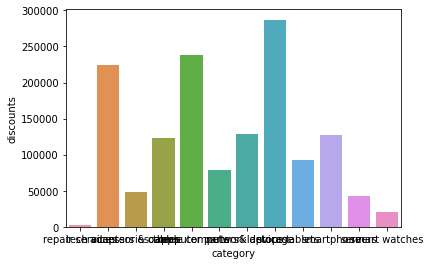

In [ ]:
sns.barplot(data=merged_table_df.groupby(["category"]).agg({"perc_discounts":"mean", "unit_price_total":"mean", "discounts":"sum"}).sort_values(by="perc_discounts", ascending=False).reset_index(),
            x="category", 
            y="discounts"
            );

### Plot discount and qty for brands

In [ ]:
merged_table_df[(merged_table_df["long"]== "Twelve South")].groupby([merged_table_df["date"].dt.year, merged_table_df["date"].dt.month])[["discounts", "qty"]].sum().plot()#.sort_values(by="perc_discounts")

### How does revenue and discount change for brands and products that are sold <6 months

products that are sold for a shorter amount of time are not more likely to have a greater discount.

There is no difference noticeable in any of the variables.

The amount of time a product is sold on the platform has not effect on discount or revenue.



In [ ]:
difference_dates_df = merged_table_df.groupby(["long", "sku"]).agg({"qty":"sum", "date":["min","max"], "unit_price":["sum", "mean"], "price":"mean", "discounts":"mean", "perc_discounts":"mean" }).reset_index()
difference_dates_df

long        sku qty                date                      \
                           sum                 min                 max   
0     8Mobility  8MO0001-A   1 2017-09-29 22:45:35 2017-09-29 22:45:35   
1     8Mobility  8MO0003-A   1 2018-03-08 18:52:29 2018-03-08 18:52:29   
2     8Mobility    8MO0007   7 2017-04-20 10:20:02 2017-09-05 07:40:35   
3     8Mobility    8MO0008  11 2017-04-25 15:29:33 2017-08-20 11:27:08   
4     8Mobility    8MO0009   5 2017-04-20 11:21:25 2018-01-27 19:52:26   
...         ...        ...  ..                 ...                 ...   
4883     iOttie    IOT0023  14 2017-01-24 11:46:48 2018-02-15 14:43:36   
4884     iOttie    IOT0024  24 2017-01-03 01:15:50 2018-03-03 15:47:41   
4885     iOttie    IOT0025  26 2017-04-30 09:45:56 2018-02-13 22:16:33   
4886     iOttie    IOT0026  10 2017-08-28 18:28:19 2018-03-04 20:03:51   
4887     iOttie    IOT0027   8 2018-02-05 19:12:03 2018-03-12 23:51:09   

     unit_price       price discounts perc_discounts  
            sum  mean  mean      mean           mean  
0         12.96 12.96 35.00     22.04          62.97  
1         12.85 12.85 35.00     22.15          63.29  
2        155.93 22.28 35.00     12.72          36.36  
3        215.90 21.59 35.00     13.41          38.31  
4         87.37 17.47 35.00     17.53          50.07  
...         ...   ...   ...       ...            ...  
4883      98.68 14.10 19.99      5.89          29.48  
4884     540.26 22.51 29.95      7.44          24.84  
4885     523.36 21.81 24.95      3.14          12.60  
4886     239.60 23.96 34.95     10.99          31.44  
4887     396.92 49.62 54.95      5.34           9.71  

[4888 rows x 10 columns]

In [ ]:
difference_dates_df["diff"] = difference_dates_df["date"]["max"]-difference_dates_df["date"]["min"]
difference_dates_df["diff_in_months"] = difference_dates_df["diff"].dt.total_seconds()/2.628e+6

difference_dates_df[difference_dates_df["diff_in_months"]<= 3.5].count()
difference_dates_df[difference_dates_df["diff_in_months"] > 3.5].count()

diff_dates_smaller_median = difference_dates_df[difference_dates_df["diff_in_months"]<= 3.5]
diff_dates_greater_median = difference_dates_df[difference_dates_df["diff_in_months"] > 3.5]
#difference_dates_df

In [ ]:
difference_dates_df[["unit_price", "perc_discounts", "diff_in_months"]].describe()

unit_price         perc_discounts diff_in_months
             sum    mean           mean               
count    4888.00 4888.00        4888.00        4888.00
mean     1365.85  157.50          22.68           4.72
std      4772.72  215.67          15.70           4.91
min         1.99    1.99           0.00           0.00
25%        74.97   26.07          11.41           0.00
50%       247.69   55.00          19.06           3.02
75%       866.66  185.48          29.78           9.07
max    112198.68  999.00          89.77          14.36

In [ ]:
diff_dates_smaller_median[["unit_price", "perc_discounts", "diff_in_months"]].describe()

unit_price         perc_discounts diff_in_months
             sum    mean           mean               
count    2584.00 2584.00        2584.00        2584.00
mean      454.84  177.62          23.45           0.70
std      1103.74  235.22          16.92           1.05
min         1.99    1.99           0.00           0.00
25%        42.85   27.99          11.11           0.00
50%       123.54   59.99          19.13           0.00
75%       451.34  236.32          31.93           1.21
max     19037.25  999.00          89.77           3.50

In [ ]:
diff_dates_smaller_median["diff_in_months"].hist();

In [ ]:
diff_dates_greater_median[["unit_price", "perc_discounts", "diff_in_months"]].describe()

In [ ]:
diff_dates_greater_median["diff_in_months"].hist()

we grouped by brands and skus therefore difference_dates_df displays the min and max date when product of a certain brand was sold. on average products of brands were sold for 5 months and 50% were sold within 3.5 months.

now we need to calculate their revenue and the average discount.
on average < 3.5 products are sold within .5 months- a lot of them (50% almost right away)

it look as if the products sold in less than 3.5 months have on average slightly more discount (3 points). 

sum of unit_price is a lot higher for products sold for more than 3.5 months.

what if we split it up even more? what does the discount look like for products sold within the first 1 months?



In [ ]:
diff_dates_smaller_1 = difference_dates_df[difference_dates_df["diff_in_months"]<= 1]
diff_dates_greater_1 = difference_dates_df[difference_dates_df["diff_in_months"] > 1]

In [ ]:
diff_dates_smaller_1[["unit_price", "perc_discounts", "diff_in_months", "qty"]].hist();

In [ ]:
diff_dates_greater_1[["unit_price", "perc_discounts", "diff_in_months", "qty"]].hist();

In [ ]:
diff_dates_smaller_median[["unit_price", "perc_discounts", "diff_in_months", "qty"]].hist();

In [ ]:
diff_dates_greater_median[["unit_price", "perc_discounts", "diff_in_months", "qty"]].hist();

products that are sold for a shorter amount of time are not more likely to have a greater discount.

There is no difference noticeable in any of the variables. 

The amount of time a product is sold on the platform has not effect on discount or revenue.

no doesn't look like it.
maybe when you look at a specific time?

In [ ]:
merged_table_df[merged_table_df["date"].between("2017-01-01", "2017-02-01")].groupby("category").agg({"qty":["sum"]}).sort_values(by="category").plot(figsize=(30,3))

In [ ]:
merged_table_df[merged_table_df["date"].between("2017-02-01", "2017-03-01")].groupby("category").agg({"qty":["sum"]}).sort_values(by="category").plot(figsize=(30,3))

In [ ]:
merged_table_df[merged_table_df["date"].between("2017-03-01", "2017-04-01")].groupby("category").agg({"qty":["sum"]}).sort_values(by="category").plot(figsize=(30,3))

### How many products do brands usually offer?

In [ ]:
merged_table_df.groupby("category").agg({"sku":["nunique"]}).plot(figsize=(30,3))


### plot Categories and compare discount and total_unit_price

In [21]:
category_max_revenue = merged_table_df.groupby("category").agg({"unit_price_total":"sum", "perc_discounts":"mean"})[["unit_price_total", "perc_discounts"]].sort_values(by="unit_price_total", ascending=False).reset_index()

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))

unit_price_total_plot = sns.barplot(data=category_max_revenue, 
                                    x = "unit_price_total", 
                                    y = "category",
                                    ax=ax,
                                    palette="deep"
                                    );

unit_price_total_plot.axes.set_title("Profit made by each category",fontsize=30)
unit_price_total_plot.set_xlabel("Profit in in Million",fontsize=20)
unit_price_total_plot.set_ylabel("Category",fontsize=20)
unit_price_total_plot.tick_params(labelsize=20)
ax.yaxis.grid(False) # Hide the horizontal gridlines
ax.xaxis.grid(True) # Show the vertical gridlines
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))

perc_discounts_plot = sns.barplot(data=category_max_revenue, 
            x = "perc_discounts", 
            y = "category",
            ax=ax,
            palette="deep",
            );

perc_discounts_plot.invert_xaxis()
ax.yaxis.tick_right()
perc_discounts_plot.axes.set_title("Average discounts offered by each category",fontsize=30)
perc_discounts_plot.set_xlabel("Discounts",fontsize=20)
perc_discounts_plot.set(ylabel=None)
perc_discounts_plot.tick_params(labelsize=20)
ax.yaxis.grid(False) # Hide the horizontal gridlines
ax.xaxis.grid(True) # Show the vertical gridlines
plt.axvline(23, 0, color = "r")

plt.show()

In [32]:
brands_max_revenue = merged_table_df.groupby("long").agg({"unit_price_total":"sum", "perc_discounts":"mean"})[["unit_price_total", "perc_discounts"]].sort_values(by="unit_price_total", ascending=False).reset_index().head(10)

In [36]:
brands_max_revenue["perc_discounts"].mean()

18.38965199403921

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))

unit_price_total_plot = sns.barplot(data=brands_max_revenue, 
                                    x = "unit_price_total", 
                                    y = "long",
                                    ax=ax,
                                    palette="deep"
                                    );

unit_price_total_plot.axes.set_title("Profit made by each brand",fontsize=30)
unit_price_total_plot.set_xlabel("Profit in in Million",fontsize=20)
unit_price_total_plot.set_ylabel("Category",fontsize=20)
unit_price_total_plot.tick_params(labelsize=20)
ax.yaxis.grid(False) # Hide the horizontal gridlines
ax.xaxis.grid(True) # Show the vertical gridlines
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))

perc_discounts_plot = sns.barplot(data=brands_max_revenue, 
            x = "perc_discounts", 
            y = "long",
            ax=ax,
            palette="deep",
            );

perc_discounts_plot.invert_xaxis()
ax.yaxis.tick_right()
perc_discounts_plot.axes.set_title("Average discounts offered by each brand",fontsize=30)
perc_discounts_plot.set_xlabel("Discounts",fontsize=20)
perc_discounts_plot.set(ylabel=None)
perc_discounts_plot.tick_params(labelsize=20)
ax.yaxis.grid(False) # Hide the horizontal gridlines
ax.xaxis.grid(True) # Show the vertical gridlines
plt.axvline(23, 0, color = "r")

plt.show()

In [ ]:
merged_table_df

# Save Data Frames

Do not forget to download your quality controlled DataFrames

In [ ]:
from google.colab import files

merged_table_df.to_csv("merged_table_df.csv", index=False)
files.download("merged_table_df.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>